#IMPORT LIBRARY

In [ ]:
!pip install --upgrade gensim
!pip install pyldavis
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=ad3fdbc56740b87efb825e4652146ff9b0d0b7c1935e75dace63b2ae0b2cadb5
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [ ]:
!pip install Sastrawi
!pip install PySastrawi
!pip install indonlp==0.3.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 1.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import gensim
from gensim import corpora
import Sastrawi
from indoNLP.preprocessing import replace_word_elongation
from indoNLP.preprocessing import replace_slang
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import CoherenceModel, LdaModel
import matplotlib.pyplot as plt

# PREPROCESSING

In [ ]:
# LOAD DATASET DAN CEK ISINYA
df = pd.read_csv('whatsapp.csv')
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,415ab93d-7e19-4934-ae4a-d3b5075afdcd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Watsap sering gangguan gimana ya?,4,0,2.24.6.77,2024-06-28 17:06:33,NaN,NaN,2.24.6.77
1,05a6da6e-cf49-4961-8c87-2e166612ab69,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,OK,5,0,2.24.12.78,2024-06-28 17:06:29,NaN,NaN,2.24.12.78
2,ac7c0f9c-d8ac-4285-b901-c2dbce9fa52b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Ok, Sangat Membantu Dalam Komunikasi",5,0,2.24.6.77,2024-06-28 17:06:07,NaN,NaN,2.24.6.77
3,e6ce63c5-1ac5-45d8-937a-8904323a5e63,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,WA nya mudah sekali kena hack..dan susah untuk...,1,0,2.24.12.78,2024-06-28 17:05:52,NaN,NaN,2.24.12.78
4,2f78daea-a425-4501-8751-aad17fa1ba29,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mudah .dlm sgla keperluan komunikasi ..ok,5,0,2.24.12.78,2024-06-28 17:05:37,NaN,NaN,2.24.12.78


In [ ]:
# HANYA MENGAMBIL KOLOM CONTENT
df = df[['content']]

In [ ]:
# DATAFRAME HANYA BERISIKAN KOLOM CONTENT
df.head()

,content
0,Watsap sering gangguan gimana ya?
1,OK
2,"Ok, Sangat Membantu Dalam Komunikasi"
3,WA nya mudah sekali kena hack..dan susah untuk...
4,Mudah .dlm sgla keperluan komunikasi ..ok


In [ ]:
df['content'] = df['content'].astype(str)

In [ ]:
# CASEFOLDING YAITU MENGUBAH SEMUA HURUF MENJADI HURUF KECIL
def casefolding(text):
  return text.lower()

df['content'] = df['content'].apply(casefolding)
df.head()

,content
0,watsap sering gangguan gimana ya?
1,ok
2,"ok, sangat membantu dalam komunikasi"
3,wa nya mudah sekali kena hack..dan susah untuk...
4,mudah .dlm sgla keperluan komunikasi ..ok


In [ ]:
# MEMBERSIHKAN TEXT JADI YANG TERSISA HANYALAH HURUF
def cleaning(text):
  content = re.sub("[^a-z]", " ", text) # hapus semua karakter kecuali a-z
  content = re.sub("\t", " ", content) # mengganti tab dengan spasi
  content = re.sub("\n", " ", content) # mengganti new line dengan spasi
  content = re.sub("\s+", " ", content) # mengganti spasi > 1 dengan 1 spasi
  content = content.strip() # menghapus spasi di awal dan akhir

  return content

df['content'] = df['content'].apply(cleaning)
df.head()

,content
0,watsap sering gangguan gimana ya
1,ok
2,ok sangat membantu dalam komunikasi
3,wa nya mudah sekali kena hack dan susah untuk ...
4,mudah dlm sgla keperluan komunikasi ok


In [ ]:
# MENGGANTI KATA KATA YANG DIPERPANJANG
from indoNLP.preprocessing import replace_word_elongation

def shorten(text):
  content = replace_word_elongation(text)
  return content

df['content'] = df['content'].apply(shorten)
df.head()

,content
0,watsap sering gangguan gimana ya
1,ok
2,ok sangat membantu dalam komunikasi
3,wa nya mudah sekali kena hack dan susah untuk ...
4,mudah dlm sgla keperluan komunikasi ok


In [ ]:
# MENGGANTI KATA KATA YANG DIPERPANJANG
def replace(match):
        if match.group(2):
            return match.group(1)
        else:
            return match.group(1) * 2

def remove_repeated_letters(sentence):
    pattern = r'(\w)(\1+)(?=\1)|(?<=\w)(\1)(\1+)(?=\b)|(?<=\w)(\w)(\1+)(?=\1\b)|(?<=\w)(\w)(\1+)(?=\b)'
    content = re.sub(pattern, replace, sentence)
    return content

df['content2'] = df['content'].apply(remove_repeated_letters)
df.head()

,content,content2
0,watsap sering gangguan gimana ya,watsap sering gangguan gimana ya
1,ok,ok
2,ok sangat membantu dalam komunikasi,ok sangat membantu dalam komunikasi
3,wa nya mudah sekali kena hack dan susah untuk ...,wa nya mudah sekali kena hack dan susah untuk ...
4,mudah dlm sgla keperluan komunikasi ok,mudah dlm sgla keperluan komunikasi ok


In [ ]:
# MENGGANTI KATA KATA SLANG
def slang(text):
  return replace_slang(text)

df['content2'] = df['content2'].apply(slang)
df.head()

,content,content2
0,watsap sering gangguan gimana ya,watsap sering gangguan bagaimana ya
1,ok,ok
2,ok sangat membantu dalam komunikasi,ok sangat membantu dalam komunikasi
3,wa nya mudah sekali kena hack dan susah untuk ...,wa nya mudah sekali kena hack dan susah untuk ...
4,mudah dlm sgla keperluan komunikasi ok,mudah dalam segala keperluan komunikasi ok


In [ ]:
#MENGHILANGKAN STOPWORDS
txt = open('stopwords_id.txt')
stopwords =  txt.read().splitlines()

def removeStopwords(text):
  new = []
  for word in text.split():
    if word in stopwords:
      continue
    else:
      new.append(word)
  new = ' '.join(new)
  return new

df['content2'] = df['content2'].apply(removeStopwords)
df.head()

,content,content2
0,watsap sering gangguan gimana ya,watsap gangguan ya
1,ok,ok
2,ok sangat membantu dalam komunikasi,ok membantu komunikasi
3,wa nya mudah sekali kena hack dan susah untuk ...,wa nya mudah kena hack susah ambil sedangan no...
4,mudah dlm sgla keperluan komunikasi ok,mudah keperluan komunikasi ok


In [ ]:
# STEMMING UNTUK MEMBUAT KATA MENJADI BENTUK DASARNYA
def stemming(text):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  content = stemmer.stem(text)
  return content

df['content2'] = df['content2'].apply(stemming)
df.head()

,content,content2
0,watsap sering gangguan gimana ya,watsap ganggu ya
1,ok,ok
2,ok sangat membantu dalam komunikasi,ok bantu komunikasi
3,wa nya mudah sekali kena hack dan susah untuk ...,wa nya mudah kena hack susah ambil sedang nomo...
4,mudah dlm sgla keperluan komunikasi ok,mudah perlu komunikasi ok


In [ ]:
# MENGHAPUS STOPWORDS LAGI SEKALI
df['content2'] = df['content2'].apply(removeStopwords)
df.head()

,content,content2
0,watsap sering gangguan gimana ya,watsap ganggu ya
1,ok,ok
2,ok sangat membantu dalam komunikasi,ok bantu komunikasi
3,wa nya mudah sekali kena hack dan susah untuk ...,wa nya mudah kena hack susah ambil nomor nya c...
4,mudah dlm sgla keperluan komunikasi ok,mudah komunikasi ok


In [ ]:
df_clean = df[['content2']]
df_clean.rename(columns={'content2': 'cleaned'}, inplace=True)
df_clean.head()

<ipython-input-28-aa042de67038>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.rename(columns={'content2': 'cleaned'}, inplace=True)


,cleaned
0,watsap ganggu ya
1,ok
2,ok bantu komunikasi
3,wa nya mudah kena hack susah ambil nomor nya c...
4,mudah komunikasi ok


In [ ]:
def tokenizing(text):
  return text.split()

df_clean['cleaned'] = df_clean['cleaned'].apply(tokenizing)
df_clean.head()

<ipython-input-30-6747ca7b9df7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cleaned'] = df_clean['cleaned'].apply(tokenizing)


,cleaned
0,"[watsap, ganggu, ya]"
1,[ok]
2,"[ok, bantu, komunikasi]"
3,"[wa, nya, mudah, kena, hack, susah, ambil, nom..."
4,"[mudah, komunikasi, ok]"


# TOPIC MODELING DENGAN LDA

In [ ]:
# MEMBUAT BOW
texts = df_clean['cleaned'].tolist()
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

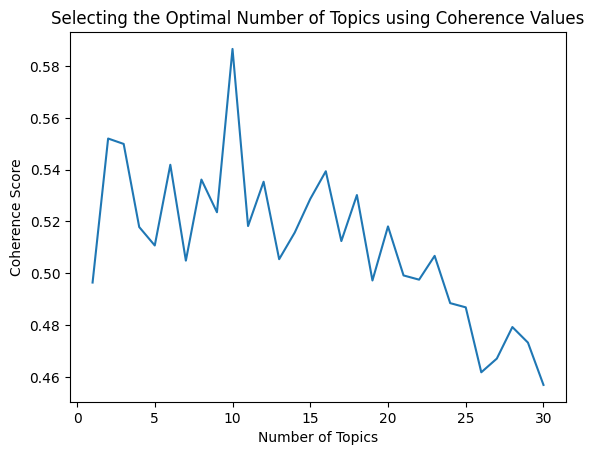

In [ ]:
# MEMBUAT MODEL LDA DAN PLOTTING NILAI COHERENCE
coherence_values = []
model_list = []
for num_topics in range(1, 31):
  lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
  model_list.append(lda_model)
  coherencemodel = CoherenceModel(model=lda_model, texts=texts, corpus=corpus, dictionary=dictionary, coherence='c_v')
  coherence_values.append(coherencemodel.get_coherence())


x = range(1, len(coherence_values) + 1)
plt.plot(x, coherence_values)
plt.xlabel("No Topik")
plt.ylabel("Coherence Score")
plt.title("Nilai Coherence 1 - 30 Topik")
plt.show()

In [ ]:
# MODEL YANG DIGUNAKAN ADALAH MODEL DENGAN JUMLAH TOPIK: 10
lda_model = model_list[9]
lda_model.show_topics(num_topics=10, num_words=10)

[(0,
  '0.041*"nya" + 0.037*"video" + 0.033*"tolong" + 0.032*"whatsap" + 0.027*"status" + 0.025*"suka" + 0.025*"kirim" + 0.023*"foto" + 0.022*"story" + 0.022*"update"'),
 (1,
  '0.227*"wa" + 0.044*"nya" + 0.034*"buka" + 0.034*"pakai" + 0.029*"resmi" + 0.023*"masuk" + 0.020*"download" + 0.018*"gua" + 0.017*"no" + 0.017*"eror"'),
 (2,
  '0.480*"bagus" + 0.129*"aplikasi" + 0.072*"banget" + 0.036*"keren" + 0.030*"nya" + 0.023*"apk" + 0.017*"suka" + 0.008*"seru" + 0.008*"pokok" + 0.007*"jos"'),
 (3,
  '0.272*"mantap" + 0.069*"update" + 0.037*"hd" + 0.036*"senang" + 0.022*"salur" + 0.020*"fitur" + 0.018*"status" + 0.013*"habis" + 0.011*"informasi" + 0.010*"baharu"'),
 (4,
  '0.166*"bantu" + 0.069*"komunikasi" + 0.065*"oke" + 0.058*"mudah" + 0.031*"kode" + 0.029*"cepat" + 0.027*"muas" + 0.024*"verifikasi" + 0.023*"keluarga" + 0.022*"masuk"'),
 (5,
  '0.150*"good" + 0.060*"puas" + 0.029*"terimakasih" + 0.025*"watsap" + 0.022*"atur" + 0.021*"dikit" + 0.021*"nice" + 0.020*"halo" + 0.019*"si" + 0

In [ ]:
# MEMBERIKAN TOPIC MENGGUNAKAN MODEL LDA
def get_dominant_topic(lda_model, corpus):
    dominant_topics = []
    for doc_bow in corpus:
        topic_probs = lda_model.get_document_topics(doc_bow)
        dominant_topic = max(topic_probs, key=lambda x: x[1])[0]
        dominant_topics.append(dominant_topic)
    return dominant_topics

dominant_topics = get_dominant_topic(lda_model, corpus)

df_clean['topic'] = dominant_topics

In [ ]:
df_clean.head()

,cleaned,topic
0,"[watsap, ganggu, ya]",9
1,[ok],7
2,"[ok, bantu, komunikasi]",4
3,"[wa, nya, mudah, kena, hack, susah, ambil, nom...",1
4,"[mudah, komunikasi, ok]",4


In [ ]:
# MEMBERI NAMA SETIAP TOPIK
topics = {
    1: "Multimedia Sharing and Updates",
    2: "Login and Access Issues",
    3: "Positive Feedback and App Satisfaction",
    4: "Updates and New Features",
    5: "Help and Verification Issues",
    6: "General Positive Feedback",
    7: "Features and Usability",
    8: "General Feedback",
    9: "App Issues and Bugs",
    10: "Account and Spam Issues"
}

df_clean['topic'] = df_clean['topic'].map(topics)
df_clean.head()

,cleaned,topic
0,"[watsap, ganggu, ya]",App Issues and Bugs
1,[ok],Features and Usability
2,"[ok, bantu, komunikasi]",Updates and New Features
3,"[wa, nya, mudah, kena, hack, susah, ambil, nom...",Multimedia Sharing and Updates
4,"[mudah, komunikasi, ok]",Updates and New Features


In [ ]:
df_clean['topic'].value_counts()

topic
Login and Access Issues                   8927
App Issues and Bugs                       5957
Help and Verification Issues              4658
Updates and New Features                  4226
Features and Usability                    3898
General Feedback                          3672
Multimedia Sharing and Updates            3552
Positive Feedback and App Satisfaction    3232
General Positive Feedback                 2982
Name: count, dtype: int64

In [ ]:
df_clean.to_csv('whatsapp_topic.csv', index=False)